**This jupyter notebook tests different losses that can be used for creating dream images using activation maximization**

In [1]:
from deep_dream import *
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

*Create a DictNet with 1000 neurons in last layer*

In [2]:
net = DictNet(1000)

*Load a previously trained network. This network has achieved ~99% training accuracy and ~85% validation accuracy in classification on 1000 5 letter words from MjSynth*

In [3]:
net.load_state_dict(torch.load("../models/net_1000_0.001_200_0.0.pth",map_location=torch.device('cpu')))

<All keys matched successfully>

*Define a function to create dream images by taking a particular label and loss type as inputs*

In [4]:
def show_dream(dreamer,label,loss_type,use_gaussian_filter=True):
    dreamer.use_gaussian_filter = use_gaussian_filter
    im,val,loss_list = dreamer(label=label,loss_type=loss_type)
    im = dreamer.postProcess(im)
    dreamer.show(im)
    return loss_list

*Create a dreamer object with image size, mean and std of Mjsynth dataset*

In [5]:
dreamer = DeepDream(net,(1,32,128),(0.47,),(0.14,),use_gaussian_filter=True)
label = 3 # label 3 is the word 'brawl'

*Do a forward pass on a random input to check the final 1000 activations on the network of the dreamer*

In [6]:
random_seed = 1
im = dreamer.createInputImage(random_seed)
im = dreamer.prepInputImage(im)
im = im.to(dreamer.device)

im = Variable(im.unsqueeze(0),requires_grad=True)
out = dreamer.net(im)
print(out)

tensor([[-21.7093, -25.8692, -29.2235, -26.6374, -37.0795, -24.0299, -20.8118,
         -28.7853, -29.5261, -32.8881, -29.0520, -15.1690, -28.5440, -21.0959,
         -27.6059, -13.4245, -25.1284, -19.1489, -31.4759, -29.9176, -18.5119,
         -25.5877, -36.6051, -27.9708, -35.7038, -25.0429, -14.6998, -15.8214,
         -17.3824, -37.8268, -28.6751, -18.3680, -32.3695, -26.9420, -35.0536,
         -31.3421, -29.3781, -29.8628, -26.4262, -18.8047, -26.9578, -24.3636,
         -29.4546, -27.3745, -19.9931, -16.9902, -26.2951, -17.6536, -20.2599,
         -30.6868, -30.3149, -34.6923, -25.8897, -40.8149, -34.2296, -27.6073,
         -27.6312,  -6.1634, -20.9652, -34.9200, -16.8543, -25.5511, -30.8833,
         -24.0516, -37.7699, -29.2652, -26.1539, -23.0885, -24.3979, -17.1478,
         -32.0797, -28.7284, -28.8490, -16.9850, -28.9012, -32.3533, -32.6370,
         -30.2274, -26.1341, -28.9525, -32.1502, -16.2662, -36.6022, -26.8332,
         -29.6360, -37.7484, -28.4498, -31.6884, -21

*We observe that all activations at the final layer are negative. The index with least absolute value will be the predicted label. Now, let's start studying the effect of various loss types on the dreaming process*

*Loss type 1 is simply the activation value for the set label at final layer. Let's create dreams for label 3 ('Brawl') with and without gaussian filter and check activation and losses*

Activation before optimizing : -30.800006866455078 
Probablity before optimizing : 0.5821488499641418 and label 261
Dreaming...
Activation after optimizing : 73.12479400634766 
Probablity after optimizing : 1.0 and label 3


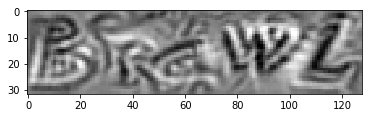

In [7]:
loss_type = 1
loss_list_w_g = show_dream(dreamer,label,loss_type)

Activation before optimizing : -30.800006866455078 
Probablity before optimizing : 0.5821488499641418 and label 261
Dreaming...
Activation after optimizing : 104.8372573852539 
Probablity after optimizing : 1.0 and label 3


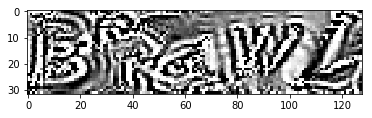

In [8]:
loss_type = 1
loss_list_wo_g = show_dream(dreamer,label,loss_type,use_gaussian_filter=False)

*Let's plot the successive losses in the 100 iterations in which the dream was created*

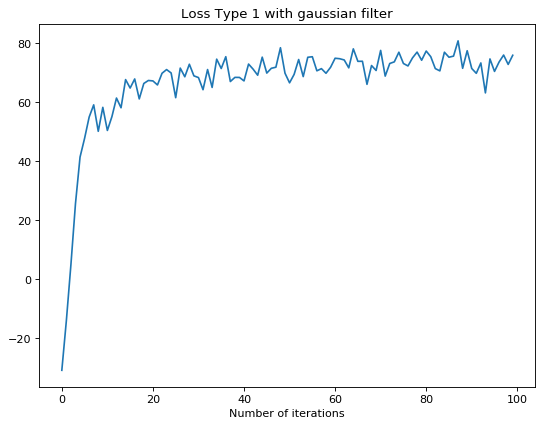

In [9]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(loss_list_w_g)
plt.title("Loss Type 1 with gaussian filter")
plt.xlabel("Number of iterations")
plt.show()

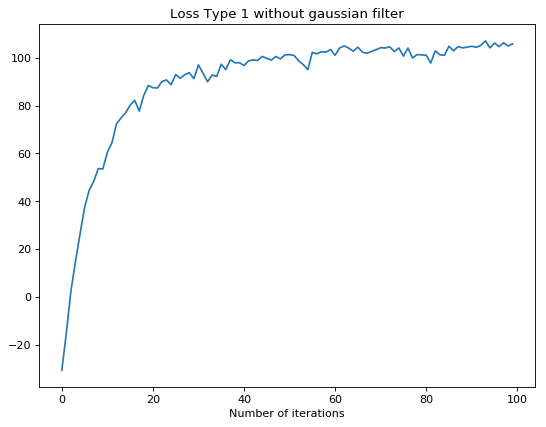

In [10]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(loss_list_wo_g)
plt.title("Loss Type 1 without gaussian filter")
plt.xlabel("Number of iterations")
plt.show()

*Loss type 2 is simply the negative of the activation of the set label at the final layer*

Activation before optimizing : -30.800006866455078 
Probablity before optimizing : 0.5821488499641418 and label 261
Dreaming...
Activation after optimizing : -159.24591064453125 
Probablity after optimizing : 0.9995416402816772 and label 489


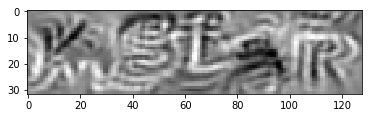

In [11]:
loss_type = 2
loss_list = show_dream(dreamer,label,loss_type)

*Again plotting the successive losses*

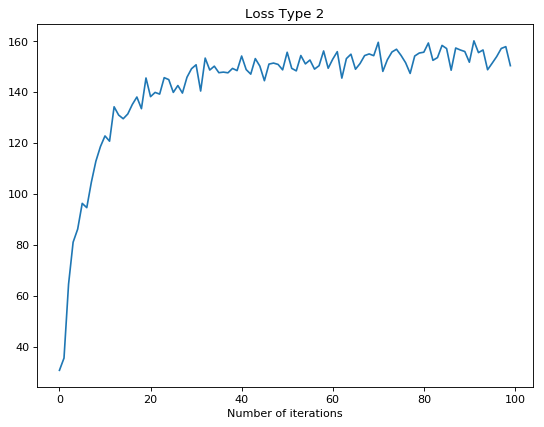

In [12]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(loss_list)
plt.title("Loss Type 2")
plt.xlabel("Number of iterations")
plt.show()

*Loss type 3 is the label value after softmaxing the final layer activations. softmax(out)[label]* 

Activation before optimizing : -30.800006866455078 
Probablity before optimizing : 0.5821488499641418 and label 261
Dreaming...


/mnt/c/Users/User/Desktop/activation_maximization_mjsynth/library/deep_dream.py:111: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  loss = F.softmax(out)[0,label]


Activation after optimizing : 39.696231842041016 
Probablity after optimizing : 1.0 and label 3


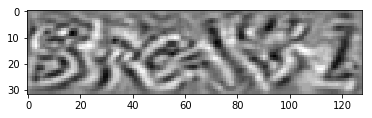

In [13]:
loss_type = 3
loss_list = show_dream(dreamer,label,loss_type)

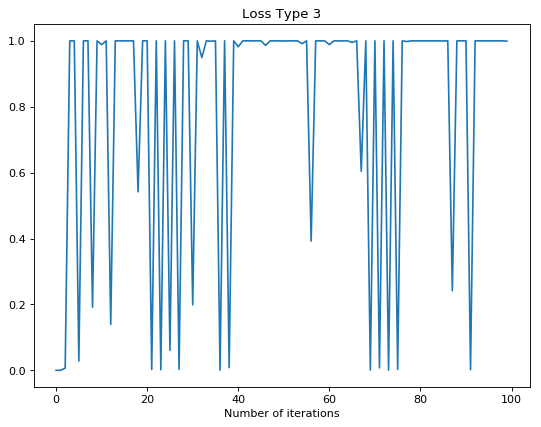

In [14]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(loss_list)
plt.title("Loss Type 3")
plt.xlabel("Number of iterations")
plt.show()

*Loss type 4 is the - label value after softmaxing the final layer activations. - softmax(out)[label]* 

Activation before optimizing : -30.800006866455078 
Probablity before optimizing : 0.5821488499641418 and label 261
Dreaming...


/mnt/c/Users/User/Desktop/activation_maximization_mjsynth/library/deep_dream.py:113: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  loss = - F.softmax(out)[0,label]


Activation after optimizing : -40.46805953979492 
Probablity after optimizing : 0.9999891519546509 and label 917


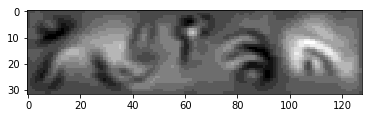

In [15]:
loss_type = 4
loss_list = show_dream(dreamer,label,loss_type)

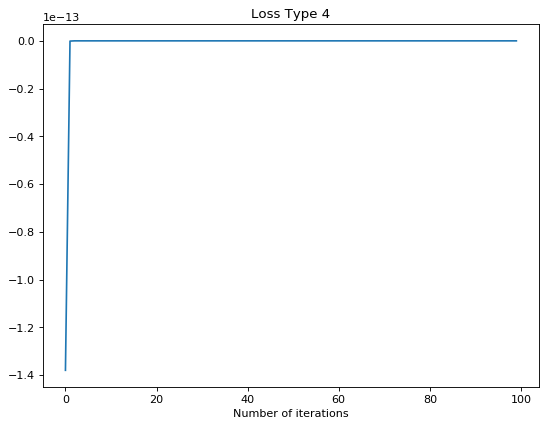

In [16]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(loss_list)
plt.title("Loss Type 4")
plt.xlabel("Number of iterations")
plt.show()

*Loss 5 is the crossentropy loss, the same that is used for classification*

Activation before optimizing : -30.800006866455078 
Probablity before optimizing : 0.5821488499641418 and label 261
Dreaming...
Activation after optimizing : -109.09330749511719 
Probablity after optimizing : 1.0 and label 956


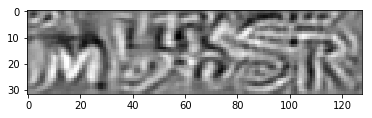

In [17]:
loss_type = 5
loss_list = show_dream(dreamer,label,loss_type)

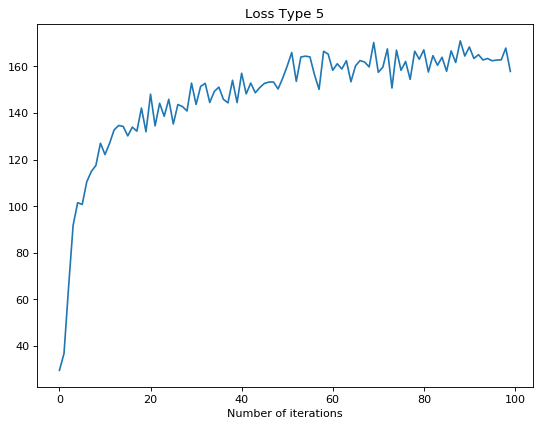

In [18]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(loss_list)
plt.title("Loss Type 5")
plt.xlabel("Number of iterations")
plt.show()

*Loss type 6 is negative of the cross entropy loss.*

Activation before optimizing : -30.800006866455078 
Probablity before optimizing : 0.5821488499641418 and label 261
Dreaming...
Activation after optimizing : 14.682199478149414 
Probablity after optimizing : 1.0 and label 3


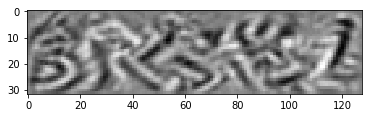

In [19]:
loss_type = 6
loss_list = show_dream(dreamer,label,loss_type)

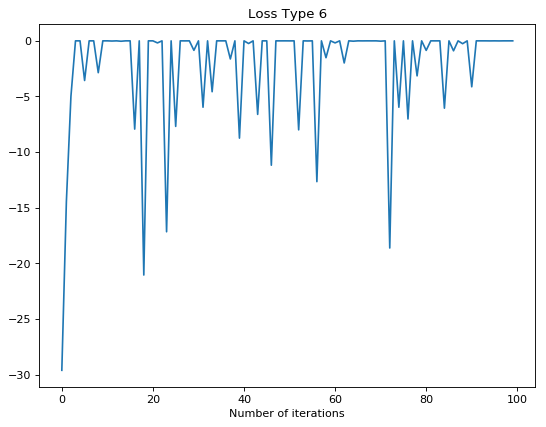

In [20]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(loss_list)
plt.title("Loss Type 6")
plt.xlabel("Number of iterations")
plt.show()